In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from collections import Counter

# Exploratory Data Analyses - EDA - Intercement data

In [2]:
xls = pd.ExcelFile(
    "../../../data/raw/Intercement/estudo.xlsm", engine="openpyxl"
)

In [3]:
xls.sheet_names

['dados', 'parametros', 'mnemonicas', 'Sheet1']

In [4]:
df = pd.read_excel(xls, "dados", parse_dates=["Data"])

In [5]:
df_2018_2019 = pd.read_excel(
    "../../../data/raw/Intercement/Dados_CAJ_2018_19.xlsx",
    engine="openpyxl",
    parse_dates=["Data"],
)

In [6]:
df.shape

(26245, 86)

In [7]:
df_2018_2019.shape

(587, 37)

In [8]:
df.columns

Index(['Data', 'RIC', 'RIC_OBS', 'Nat', 'Nat1', 'Lp', 'Ec', 'Lc', 'RIE',
       'RIE_OBS', 'Rept', 'COD_MN', 'COD_ENT', 'COD_PROD', 'COD_VAR_PROD',
       'AGP', 'IP', 'FP', 'G75�', 'G44�', 'MVOL', 'SBL', 'RC3', 'RC7', 'RC28',
       'RICARB', 'PF', 'AL2O3', 'CAOT', 'K2O', 'MGO', 'SIO2', 'FE2O3', 'SO3',
       'NA2O', 'P2O5', 'EXP', 'RC1', 'RC91', 'CO2', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',
       'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68',
       'Unnamed: 69', 'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72',
       'Unnamed: 73', 'Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76',
       'Unnamed: 77', 'Un

In [9]:
df_2018_2019.columns

Index(['Data', 'RIC', 'RIC_OBS', 'Nat', 'Nat1', 'Lp', 'Ec', 'Lc', 'RIE',
       'RIE_OBS', 'Rept', 'COD_MN', 'COD_ENT', 'COD_PROD', 'COD_VAR_PROD',
       'AGP', 'IP', 'FP', 'G44�', 'SBL', 'RC1', 'RC3', 'RC7', 'RC28', 'PF',
       'AL2O3', 'CAOT', 'K2O', 'MGO', 'SIO2', 'FE2O3', 'SO3', 'P2O5', 'G75�',
       'EXP', 'RICARB', 'RC91'],
      dtype='object')

In [10]:
set(df.columns) - set(df_2018_2019.columns)

{'CO2',
 'MVOL',
 'NA2O',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Unnamed: 43',
 'Unnamed: 44',
 'Unnamed: 45',
 'Unnamed: 46',
 'Unnamed: 47',
 'Unnamed: 48',
 'Unnamed: 49',
 'Unnamed: 50',
 'Unnamed: 51',
 'Unnamed: 52',
 'Unnamed: 53',
 'Unnamed: 54',
 'Unnamed: 55',
 'Unnamed: 56',
 'Unnamed: 57',
 'Unnamed: 58',
 'Unnamed: 59',
 'Unnamed: 60',
 'Unnamed: 61',
 'Unnamed: 62',
 'Unnamed: 63',
 'Unnamed: 64',
 'Unnamed: 65',
 'Unnamed: 66',
 'Unnamed: 67',
 'Unnamed: 68',
 'Unnamed: 69',
 'Unnamed: 70',
 'Unnamed: 71',
 'Unnamed: 72',
 'Unnamed: 73',
 'Unnamed: 74',
 'Unnamed: 75',
 'Unnamed: 76',
 'Unnamed: 77',
 'Unnamed: 78',
 'Unnamed: 79',
 'Unnamed: 80',
 'Unnamed: 81',
 'Unnamed: 82',
 'Unnamed: 83',
 'Unnamed: 84',
 'Unnamed: 85'}

In [11]:
df[["CO2", "MVOL", "NA2O"]].isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

,Missing (count)
CO2,26220
NA2O,25274
MVOL,22234


In [12]:
(df[["CO2", "MVOL", "NA2O"]].isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
CO2,99.904744
NA2O,96.300248
MVOL,84.717089


In [13]:
df["MVOL"].describe()

count    4011.000000
mean        3.074737
std         0.080047
min         0.900000
25%         3.030000
50%         3.090000
75%         3.110000
max         3.190000
Name: MVOL, dtype: float64

## Initial Preprocessing

    Removes Unammed columns
    Remove lines where all values are missing
    Rename columns with unknown characters due unicode error
    Concatenate the dataframes on columns axis

In [14]:
# 2008-2017
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df[~df.isna().all(axis=1)]
df = df.rename({"G75�": "G75", "G44�": "G44"}, axis=1)

# 2018-2019
df_2018_2019 = df_2018_2019.rename({"G75�": "G75", "G44�": "G44"}, axis=1)

df = pd.concat([df, df_2018_2019]).reset_index(drop=True)

## Exploratory data Analysis

In [15]:
df.shape

(5574, 40)

In [16]:
df.head()

,Data,RIC,RIC_OBS,Nat,Nat1,Lp,Ec,Lc,RIE,RIE_OBS,...,MGO,SIO2,FE2O3,SO3,NA2O,P2O5,EXP,RC1,RC91,CO2
0,2008-01-02,3323A,NaN,AC,NaN,-,CAJ,-,3323A,NaN,...,6.17,17.29,4.34,2.75,0.08,0.85,NaN,NaN,NaN,NaN
1,2008-01-02,3324A,NaN,AC,NaN,-,CAJ,-,3324A,NaN,...,6.04,18.35,4.22,2.86,0.08,0.75,NaN,NaN,NaN,NaN
2,2008-01-03,3304A,NaN,AC,NaN,-,CAJ,-,3304A,NaN,...,6.20,18.42,4.37,2.91,0.08,0.76,NaN,NaN,NaN,NaN
3,2008-01-03,3302A,NaN,AC,NaN,-,CAJ,-,3302A,NaN,...,6.26,17.44,4.56,2.82,0.08,0.89,NaN,NaN,NaN,NaN
4,2008-01-04,3284A,NaN,VM,NaN,-,CAJ,-,3284A,NaN,...,5.33,17.60,2.31,3.25,NaN,0.09,0.0,NaN,NaN,NaN


In [17]:
df.tail()

,Data,RIC,RIC_OBS,Nat,Nat1,Lp,Ec,Lc,RIE,RIE_OBS,...,MGO,SIO2,FE2O3,SO3,NA2O,P2O5,EXP,RC1,RC91,CO2
5569,2019-07-27,8148B,NaN,AC,NaN,-,CAJ,-,8148B,NaN,...,5.48,15.47,3.91,2.76,NaN,0.89,NaN,NaN,44.4,NaN
5570,2019-07-29,8146B,NaN,AC,NaN,-,CAJ,-,8146B,NaN,...,5.70,16.86,3.90,2.69,NaN,0.99,NaN,13.0,NaN,NaN
5571,2019-07-30,8147B,NaN,AC,NaN,-,CAJ,-,8147B,NaN,...,6.09,16.25,3.87,2.69,NaN,0.99,NaN,13.6,NaN,NaN
5572,2019-07-30,8149B,NaN,AC,NaN,-,CAJ,-,8149B,NaN,...,5.82,14.65,2.92,3.11,NaN,0.80,NaN,NaN,NaN,NaN
5573,2019-07-31,8150B,NaN,AC,NaN,-,CAJ,-,8150B,NaN,...,5.81,17.36,3.91,2.99,NaN,0.93,NaN,11.2,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          5574 non-null   datetime64[ns]
 1   RIC           5574 non-null   object        
 2   RIC_OBS       0 non-null      float64       
 3   Nat           5574 non-null   object        
 4   Nat1          22 non-null     object        
 5   Lp            5574 non-null   object        
 6   Ec            5574 non-null   object        
 7   Lc            5574 non-null   object        
 8   RIE           5574 non-null   object        
 9   RIE_OBS       0 non-null      float64       
 10  Rept          0 non-null      float64       
 11  COD_MN        5574 non-null   object        
 12  COD_ENT       5574 non-null   object        
 13  COD_PROD      5574 non-null   object        
 14  COD_VAR_PROD  5551 non-null   object        
 15  AGP           5555 non-null   float64 

<h2>1. Structure Investigation</h2>

In [19]:
df.dtypes.value_counts()

float64           28
object            11
datetime64[ns]     1
dtype: int64

<h3>1.1 Structure of numerical features</h3>

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RIC_OBS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RIE_OBS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rept,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGP,5555.0,29.627093,1.062451,20.20,29.00,29.60,30.400,38.80
IP,5559.0,211.791509,28.300994,105.00,190.00,210.00,230.000,330.00
FP,5550.0,298.796757,43.246811,165.00,265.00,300.00,330.000,495.00
G75,5550.0,0.102890,0.166140,0.00,0.10,0.10,0.100,7.83
G44,5425.0,0.938194,0.711210,0.03,0.60,0.70,1.100,15.80
MVOL,4011.0,3.074737,0.080047,0.90,3.03,3.09,3.110,3.19
SBL,5565.0,4808.456424,421.718959,3350.00,4500.00,4850.00,5130.000,6300.00


<h3>1.2 Structure of Non-Numeric features</h3>

In [21]:
df.describe(exclude='number').T

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last
Data,5574,2914,2014-03-24 00:00:00,7,2008-01-02,2019-12-07
RIC,5574,5574,2223B,1,NaT,NaT
Nat,5574,7,AC,5427,NaT,NaT
Nat1,22,1,AB,22,NaT,NaT
Lp,5574,4,-,5386,NaT,NaT
Ec,5574,1,CAJ,5574,NaT,NaT
Lc,5574,5,-,5370,NaT,NaT
RIE,5574,5574,2223B,1,NaT,NaT
COD_MN,5574,1,CEMBRCAJ,5574,NaT,NaT
COD_ENT,5574,1,CAJ,5574,NaT,NaT


In [22]:
df["COD_PROD"].unique()

array(['CPIIF32', 'CPIIF40'], dtype=object)

In [23]:
dates = df["Data"]

In [24]:
print(dates.min())
print(dates.max())

2008-01-02 00:00:00
2019-12-07 00:00:00


In [25]:
dates

0      2008-01-02
1      2008-01-02
2      2008-01-03
3      2008-01-03
4      2008-01-04
          ...    
5569   2019-07-27
5570   2019-07-29
5571   2019-07-30
5572   2019-07-30
5573   2019-07-31
Name: Data, Length: 5574, dtype: datetime64[ns]

In [26]:
for column in df.dtypes[df.dtypes == object].keys():
    print(column, df[column].unique())


RIC ['3323A' '3324A' '3304A' ... '8147B' '8149B' '8150B']
Nat ['AC' 'VM' 'FA' 'EC' 'KP' 'RM' 'AB']
Nat1 [nan 'AB']
Lp ['-' '--' 'CIP' 1]
Ec ['CAJ']
Lc ['-' '--' 1 'AF1' 'CIP']
RIE ['3323A' '3324A' '3304A' ... '8147B' '8149B' '8150B']
COD_MN ['CEMBRCAJ']
COD_ENT ['CAJ']
COD_PROD ['CPIIF32' 'CPIIF40']
COD_VAR_PROD ['GRA' 'SAC' nan 'ESC']


<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<AxesSubplot:title={'center':'Unique Values per feature'}>

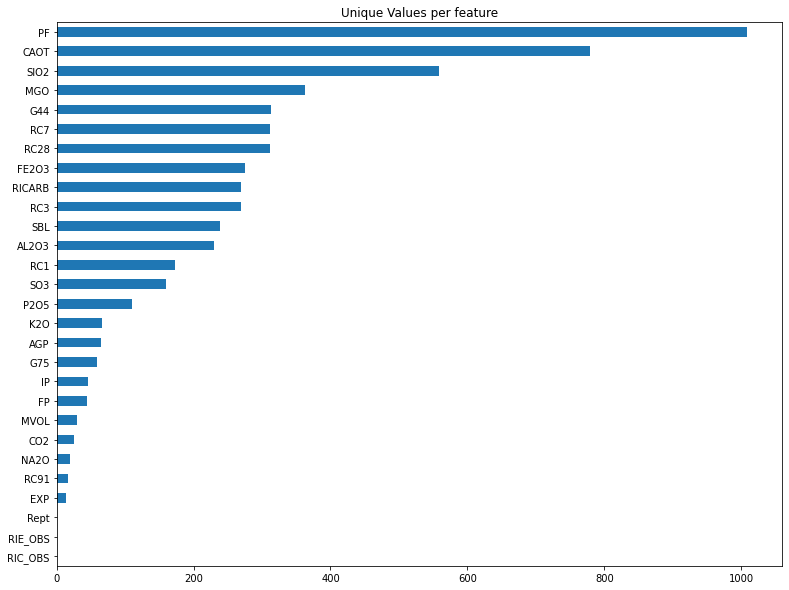

In [27]:
unique_values = df.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title='Unique Values per feature')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Nat1'),
  Text(1, 0, 'Ec'),
  Text(2, 0, 'COD_MN'),
  Text(3, 0, 'COD_ENT'),
  Text(4, 0, 'COD_PROD'),
  Text(5, 0, 'COD_VAR_PROD'),
  Text(6, 0, 'Lp'),
  Text(7, 0, 'Lc'),
  Text(8, 0, 'Nat'),
  Text(9, 0, 'Data'),
  Text(10, 0, 'RIC'),
  Text(11, 0, 'RIE')])

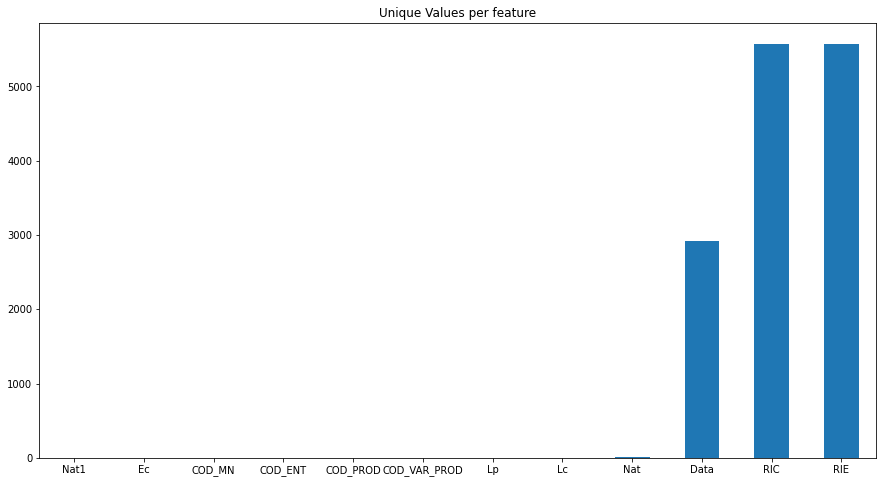

In [28]:
unique_values = df.select_dtypes(exclude='number').nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title='Unique Values per feature')

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [29]:
print("There are", df.isna().any().sum(), "variables with missing values from a total of", df.shape[1])

There are 30 variables with missing values from a total of 40


In [30]:
df.isna().any().sort_values()

Data            False
COD_PROD        False
COD_ENT         False
RIE             False
Lc              False
Ec              False
COD_MN          False
Nat             False
RIC             False
Lp              False
EXP              True
PF               True
AL2O3            True
CAOT             True
K2O              True
MGO              True
FE2O3            True
SO3              True
RC1              True
RICARB           True
NA2O             True
P2O5             True
SIO2             True
RC28             True
G44              True
RC3              True
SBL              True
MVOL             True
RC91             True
G75              True
FP               True
IP               True
AGP              True
COD_VAR_PROD     True
Rept             True
RIE_OBS          True
Nat1             True
RIC_OBS          True
RC7              True
CO2              True
dtype: bool

In [31]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

,Missing (count)
RIC_OBS,5574
RIE_OBS,5574
Rept,5574
RC91,5557
Nat1,5552
CO2,5549
NA2O,4603
EXP,4361
RC1,2383
MVOL,1563


In [32]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  48605 missing values.


/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of quantity of missing values')

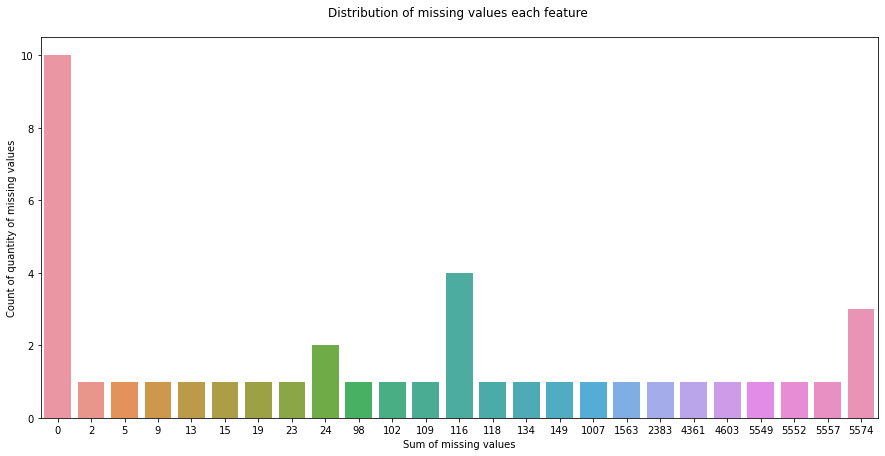

In [33]:
plt.figure(figsize=(15, 7))
sns.countplot(df.isna().sum())
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

<BarContainer object of 40 artists>

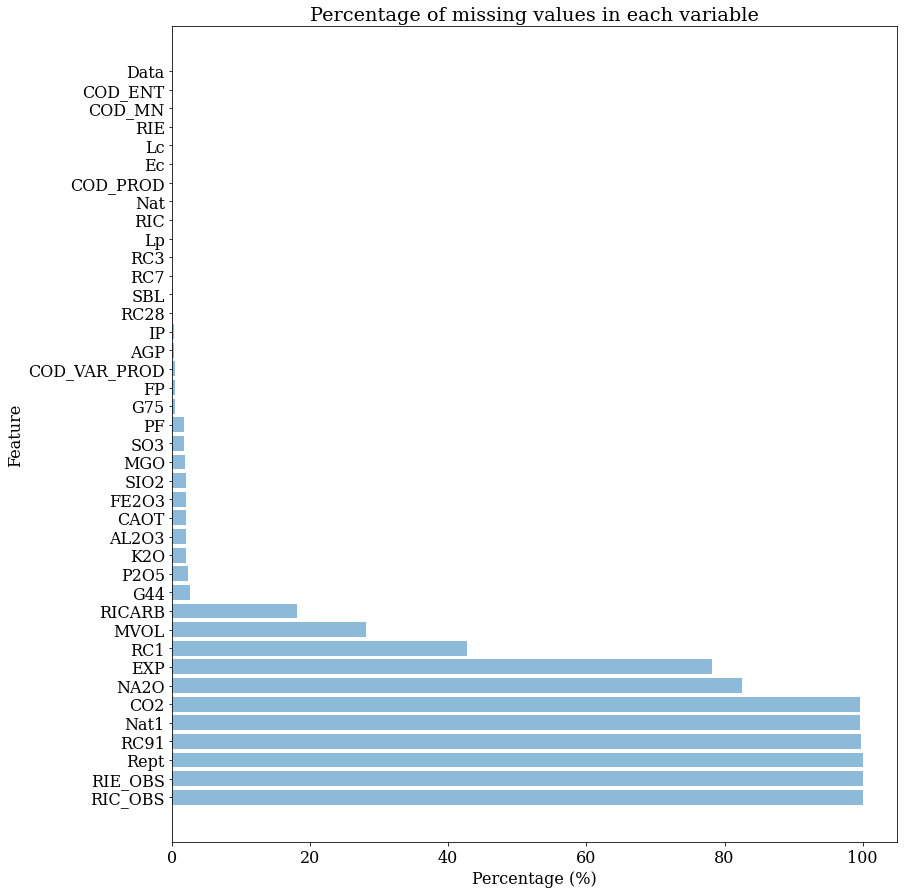

In [34]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [35]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
RIC_OBS,100.000000
RIE_OBS,100.000000
Rept,100.000000
RC91,99.695013
Nat1,99.605310
CO2,99.551489
NA2O,82.579835
EXP,78.238249
RC1,42.752063
MVOL,28.040904


<BarContainer object of 40 artists>

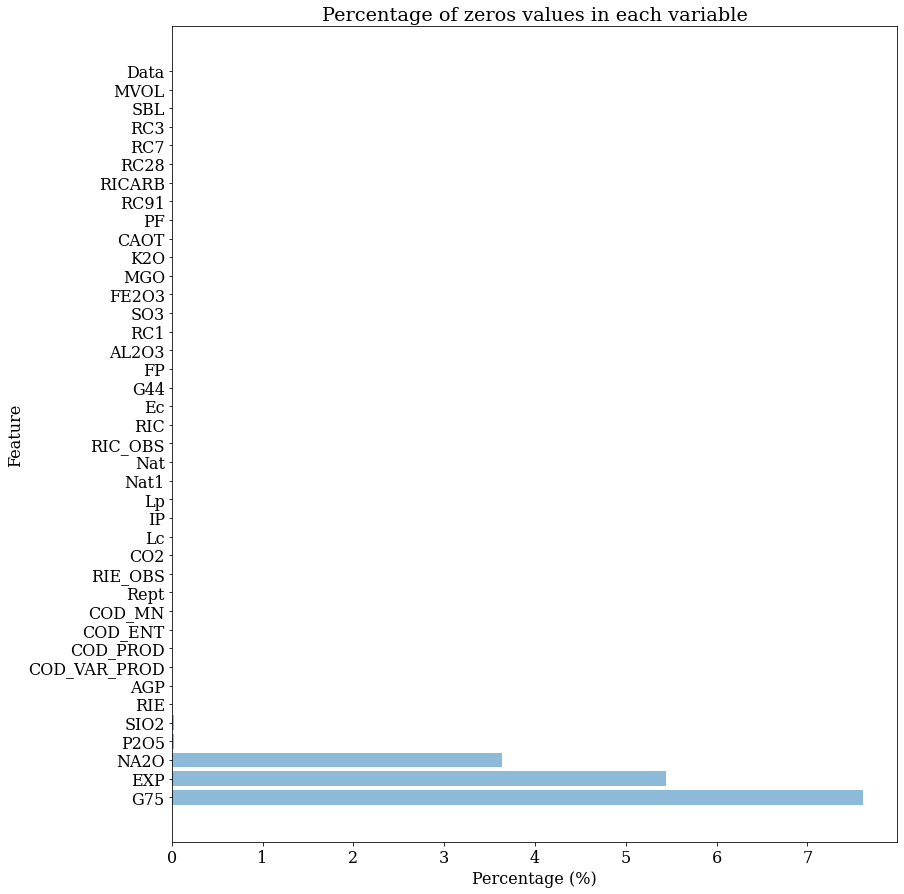

In [36]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [37]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


In [38]:
n_duplicates = (
    df.drop(["Data"], axis=1)
    .duplicated()
    .sum()
)
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

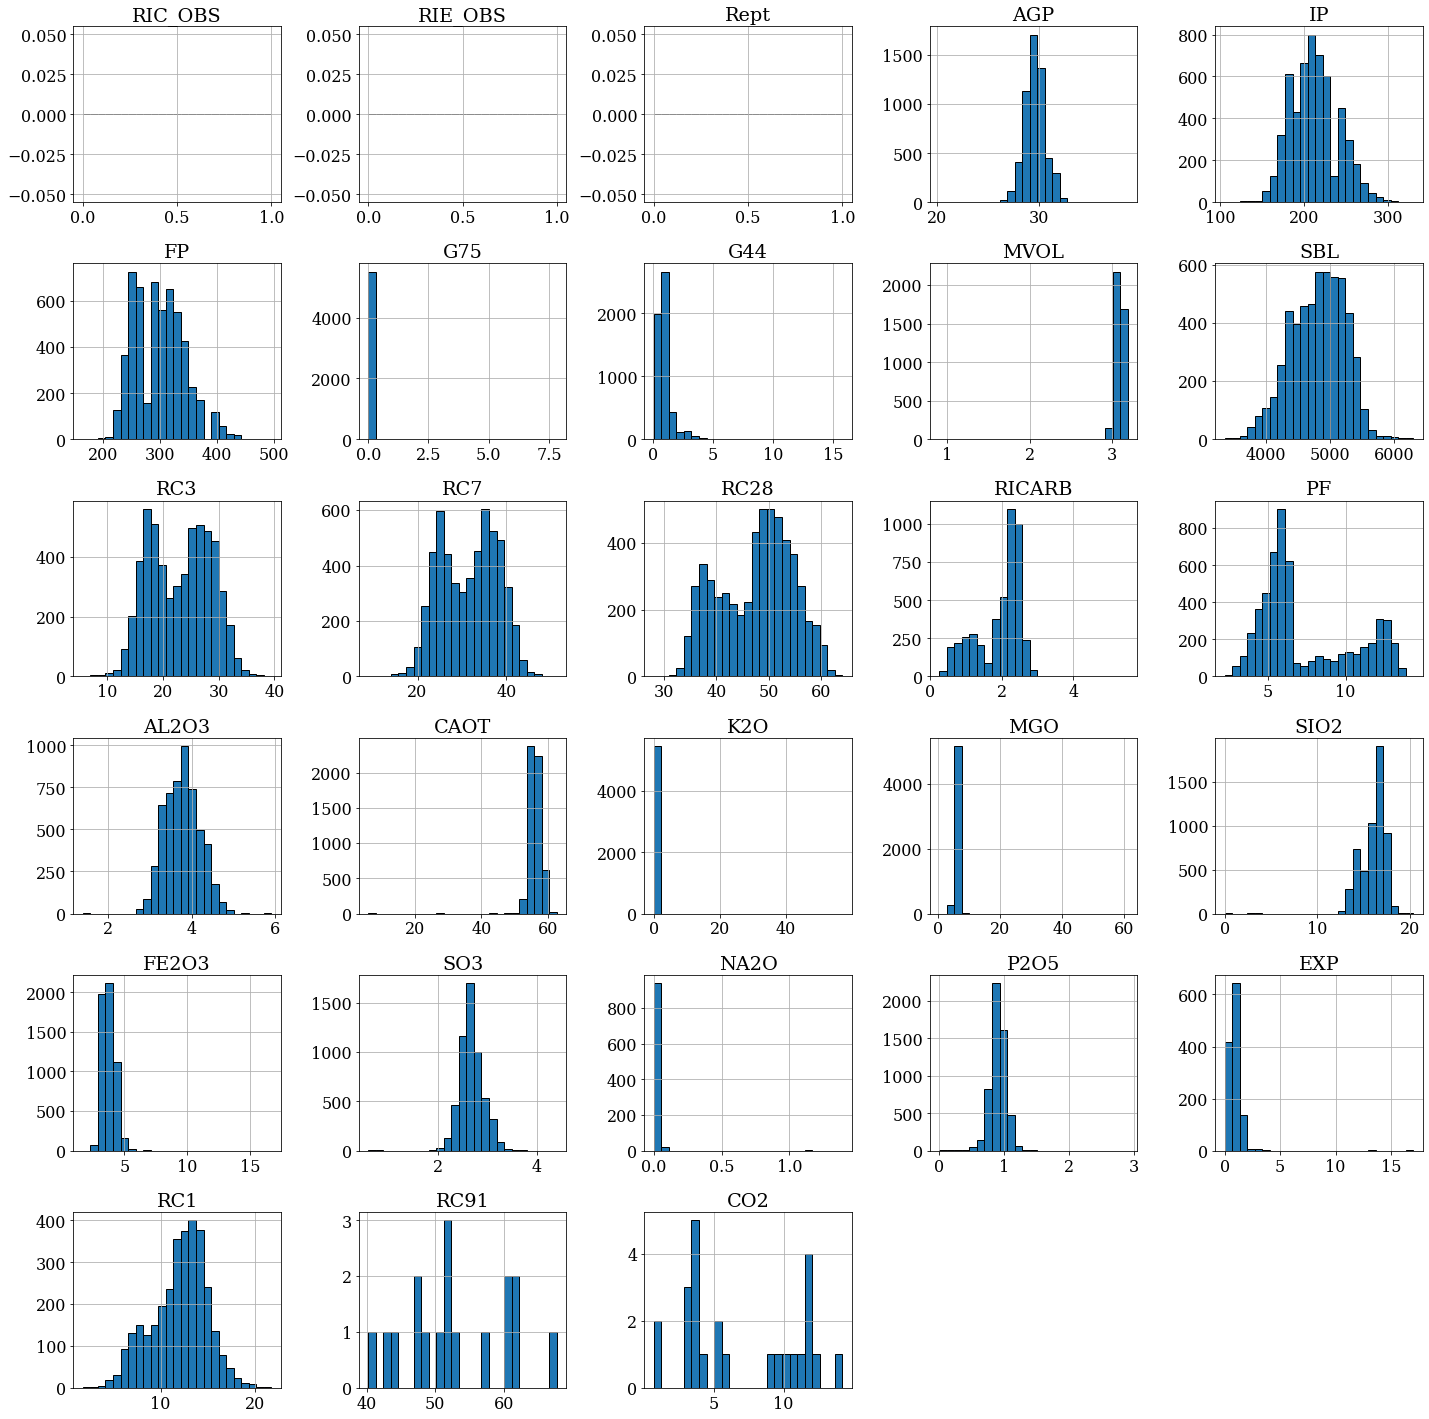

In [39]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

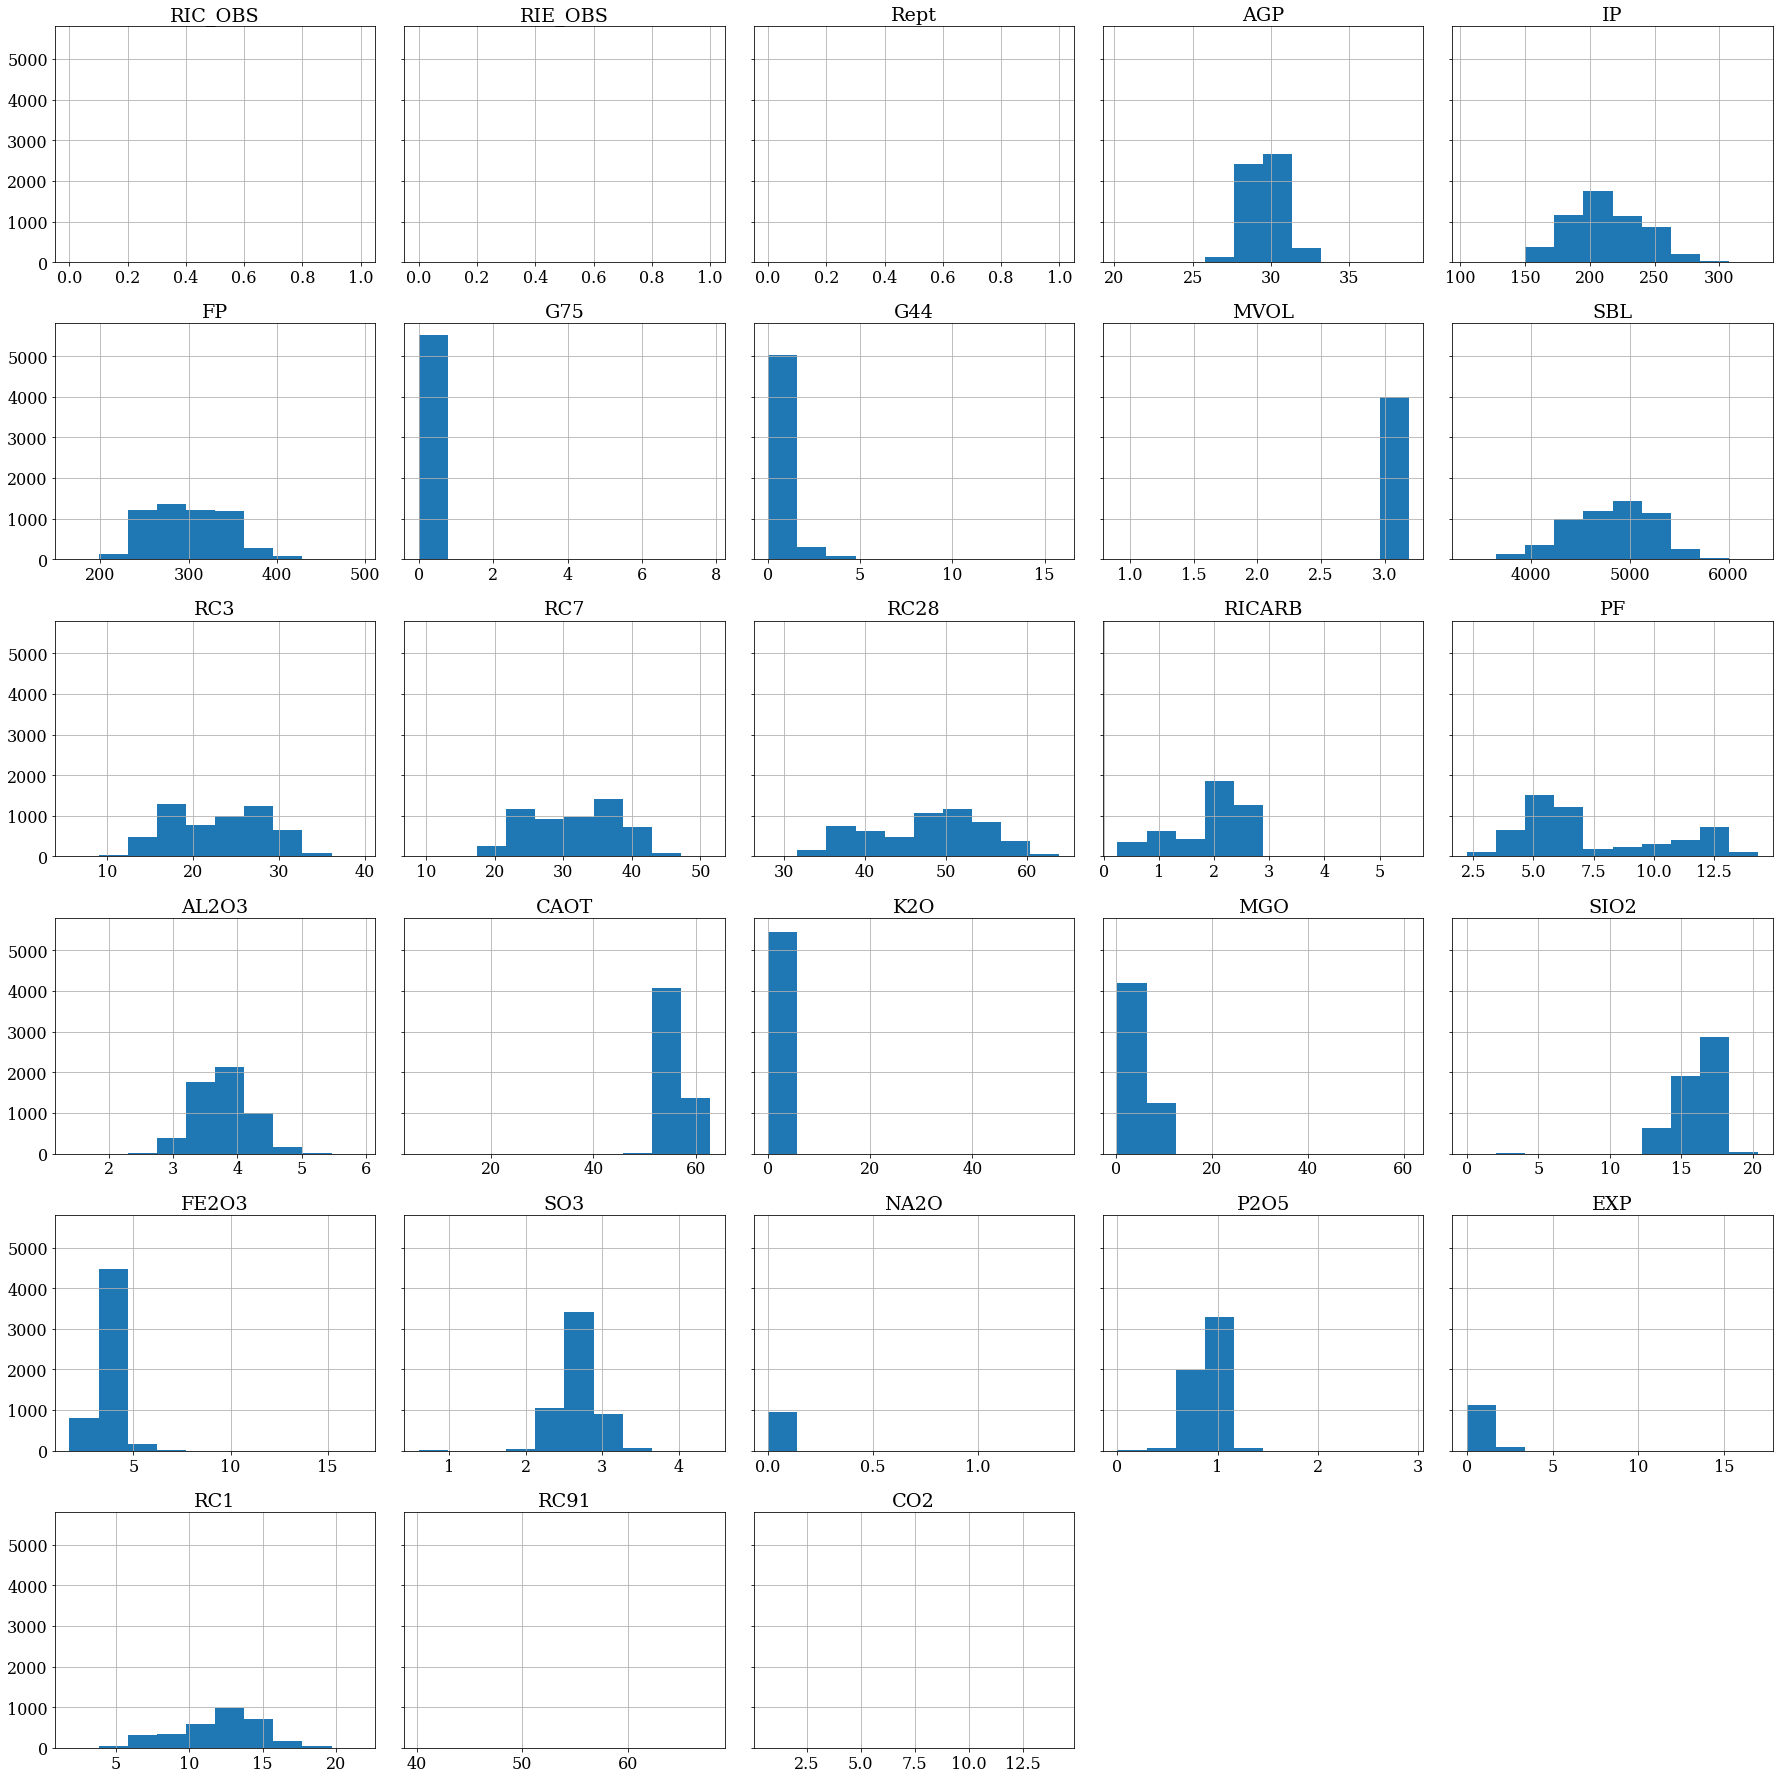

In [40]:
df.select_dtypes(include='float64').hist(figsize=(25, 25), sharey=True);
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

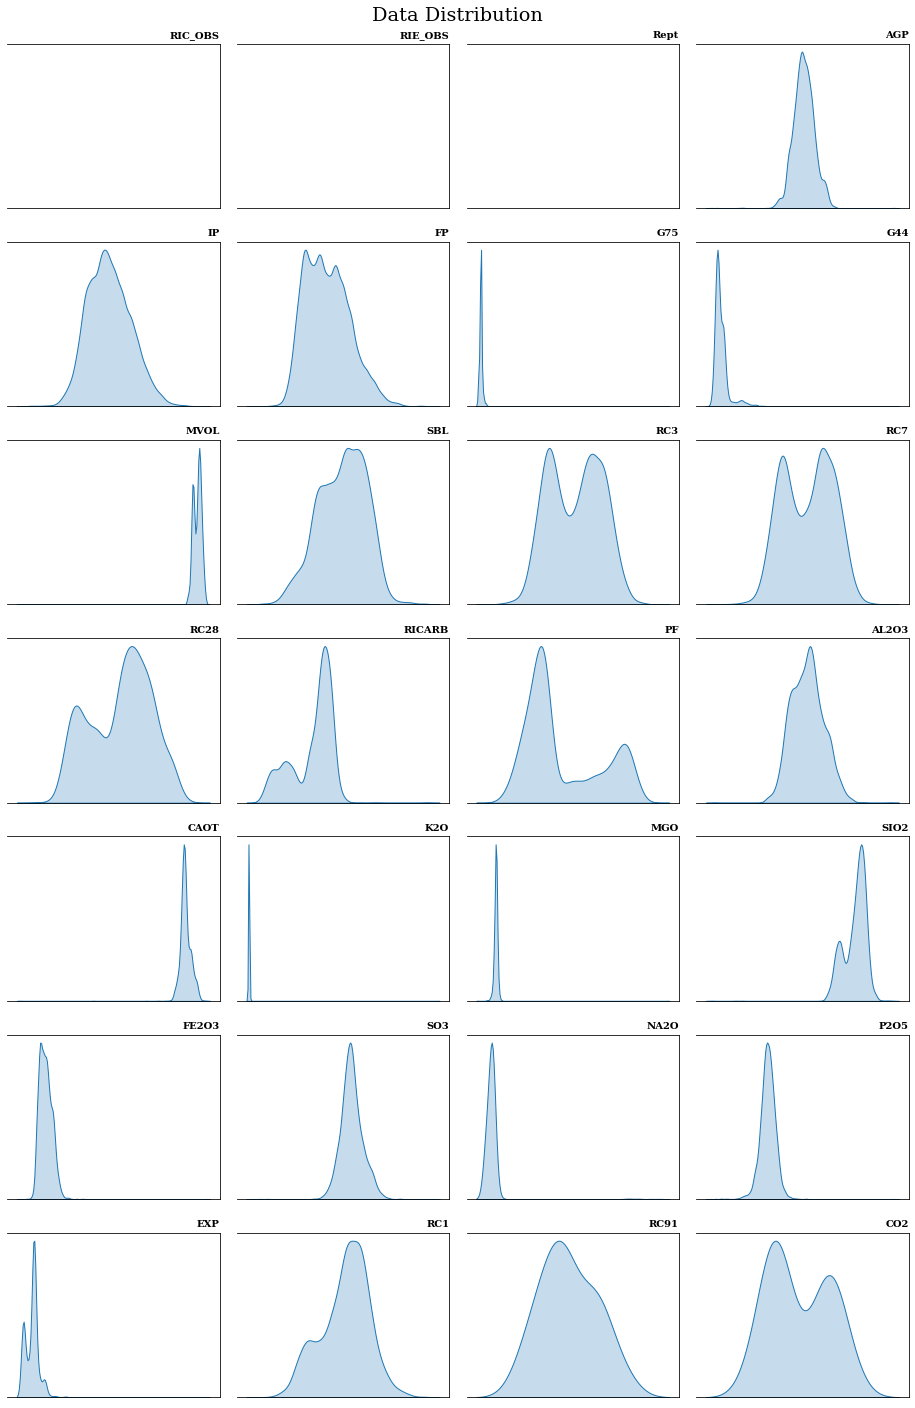

In [41]:
fig, axes = plt.subplots(7, 4, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

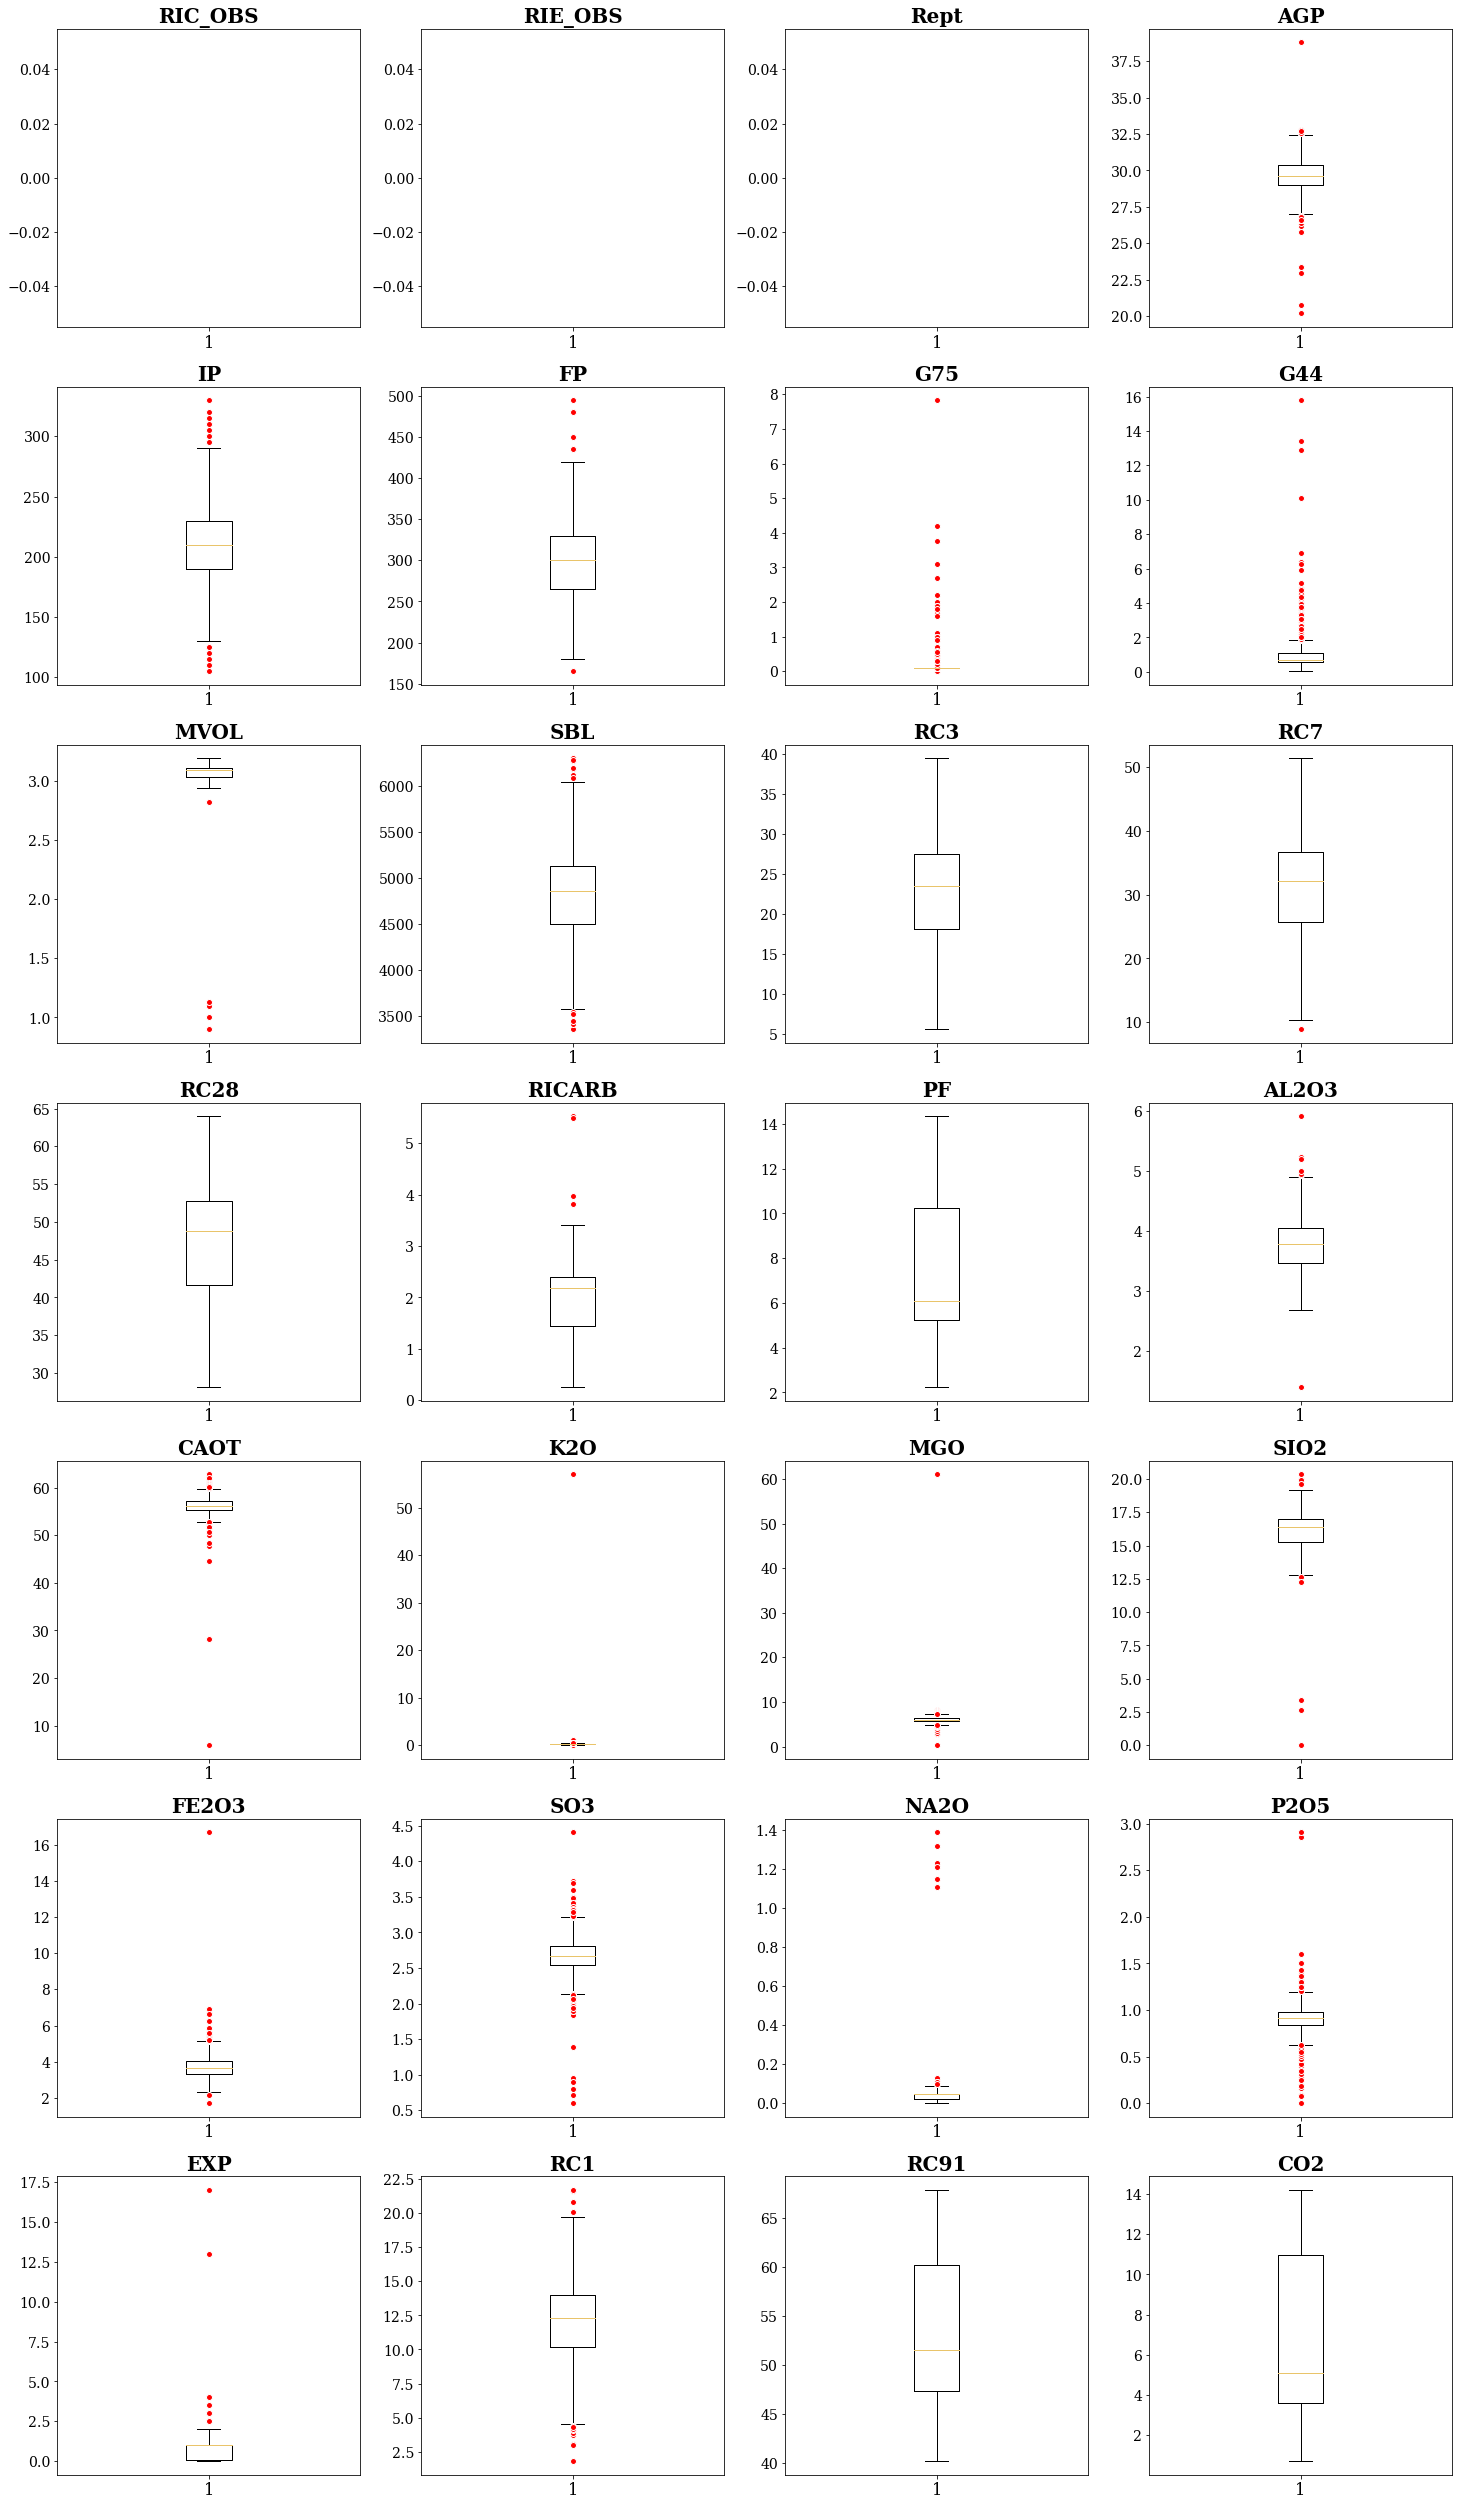

In [42]:
#Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include='float64').columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(7, 4, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

<h3>3.3. Feature Relationship</h3>

<AxesSubplot:>

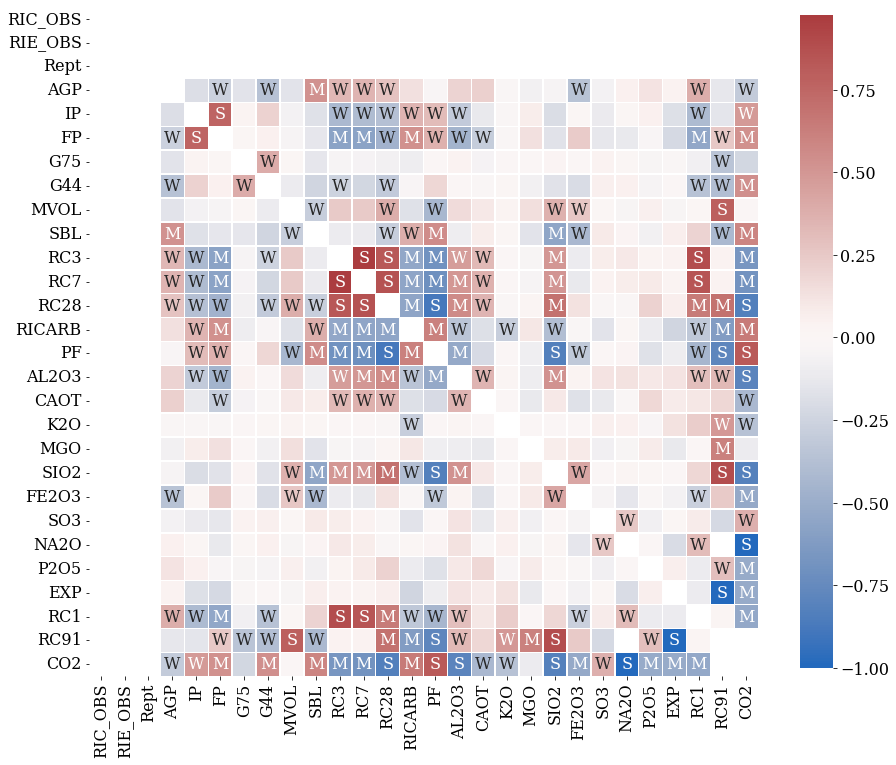

In [43]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) >= 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

<AxesSubplot:>

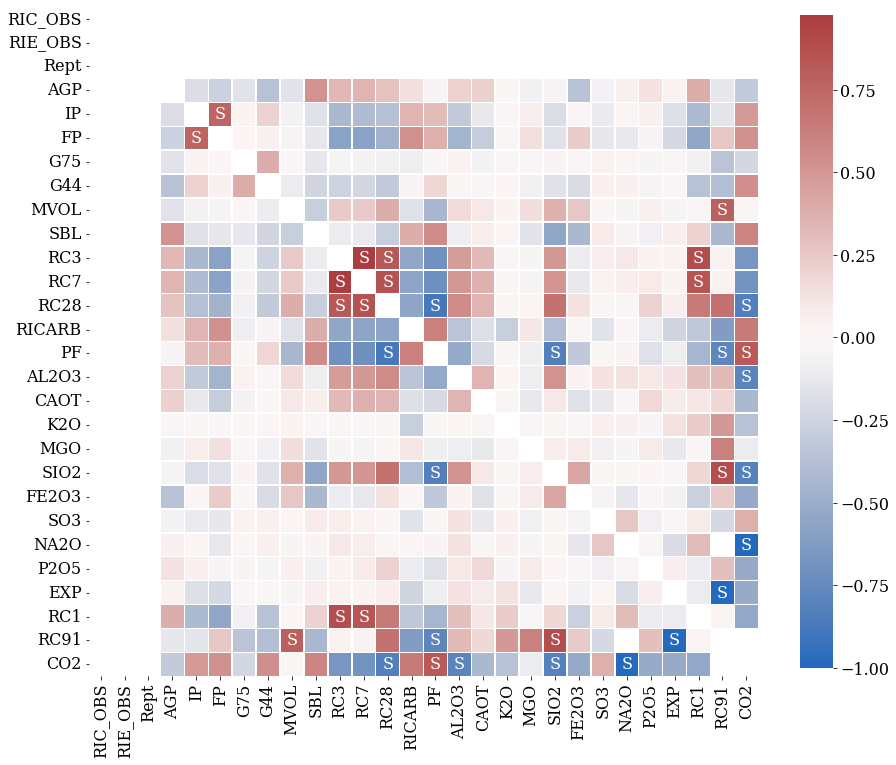

In [44]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr) >= 0.75, "S", "")


# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

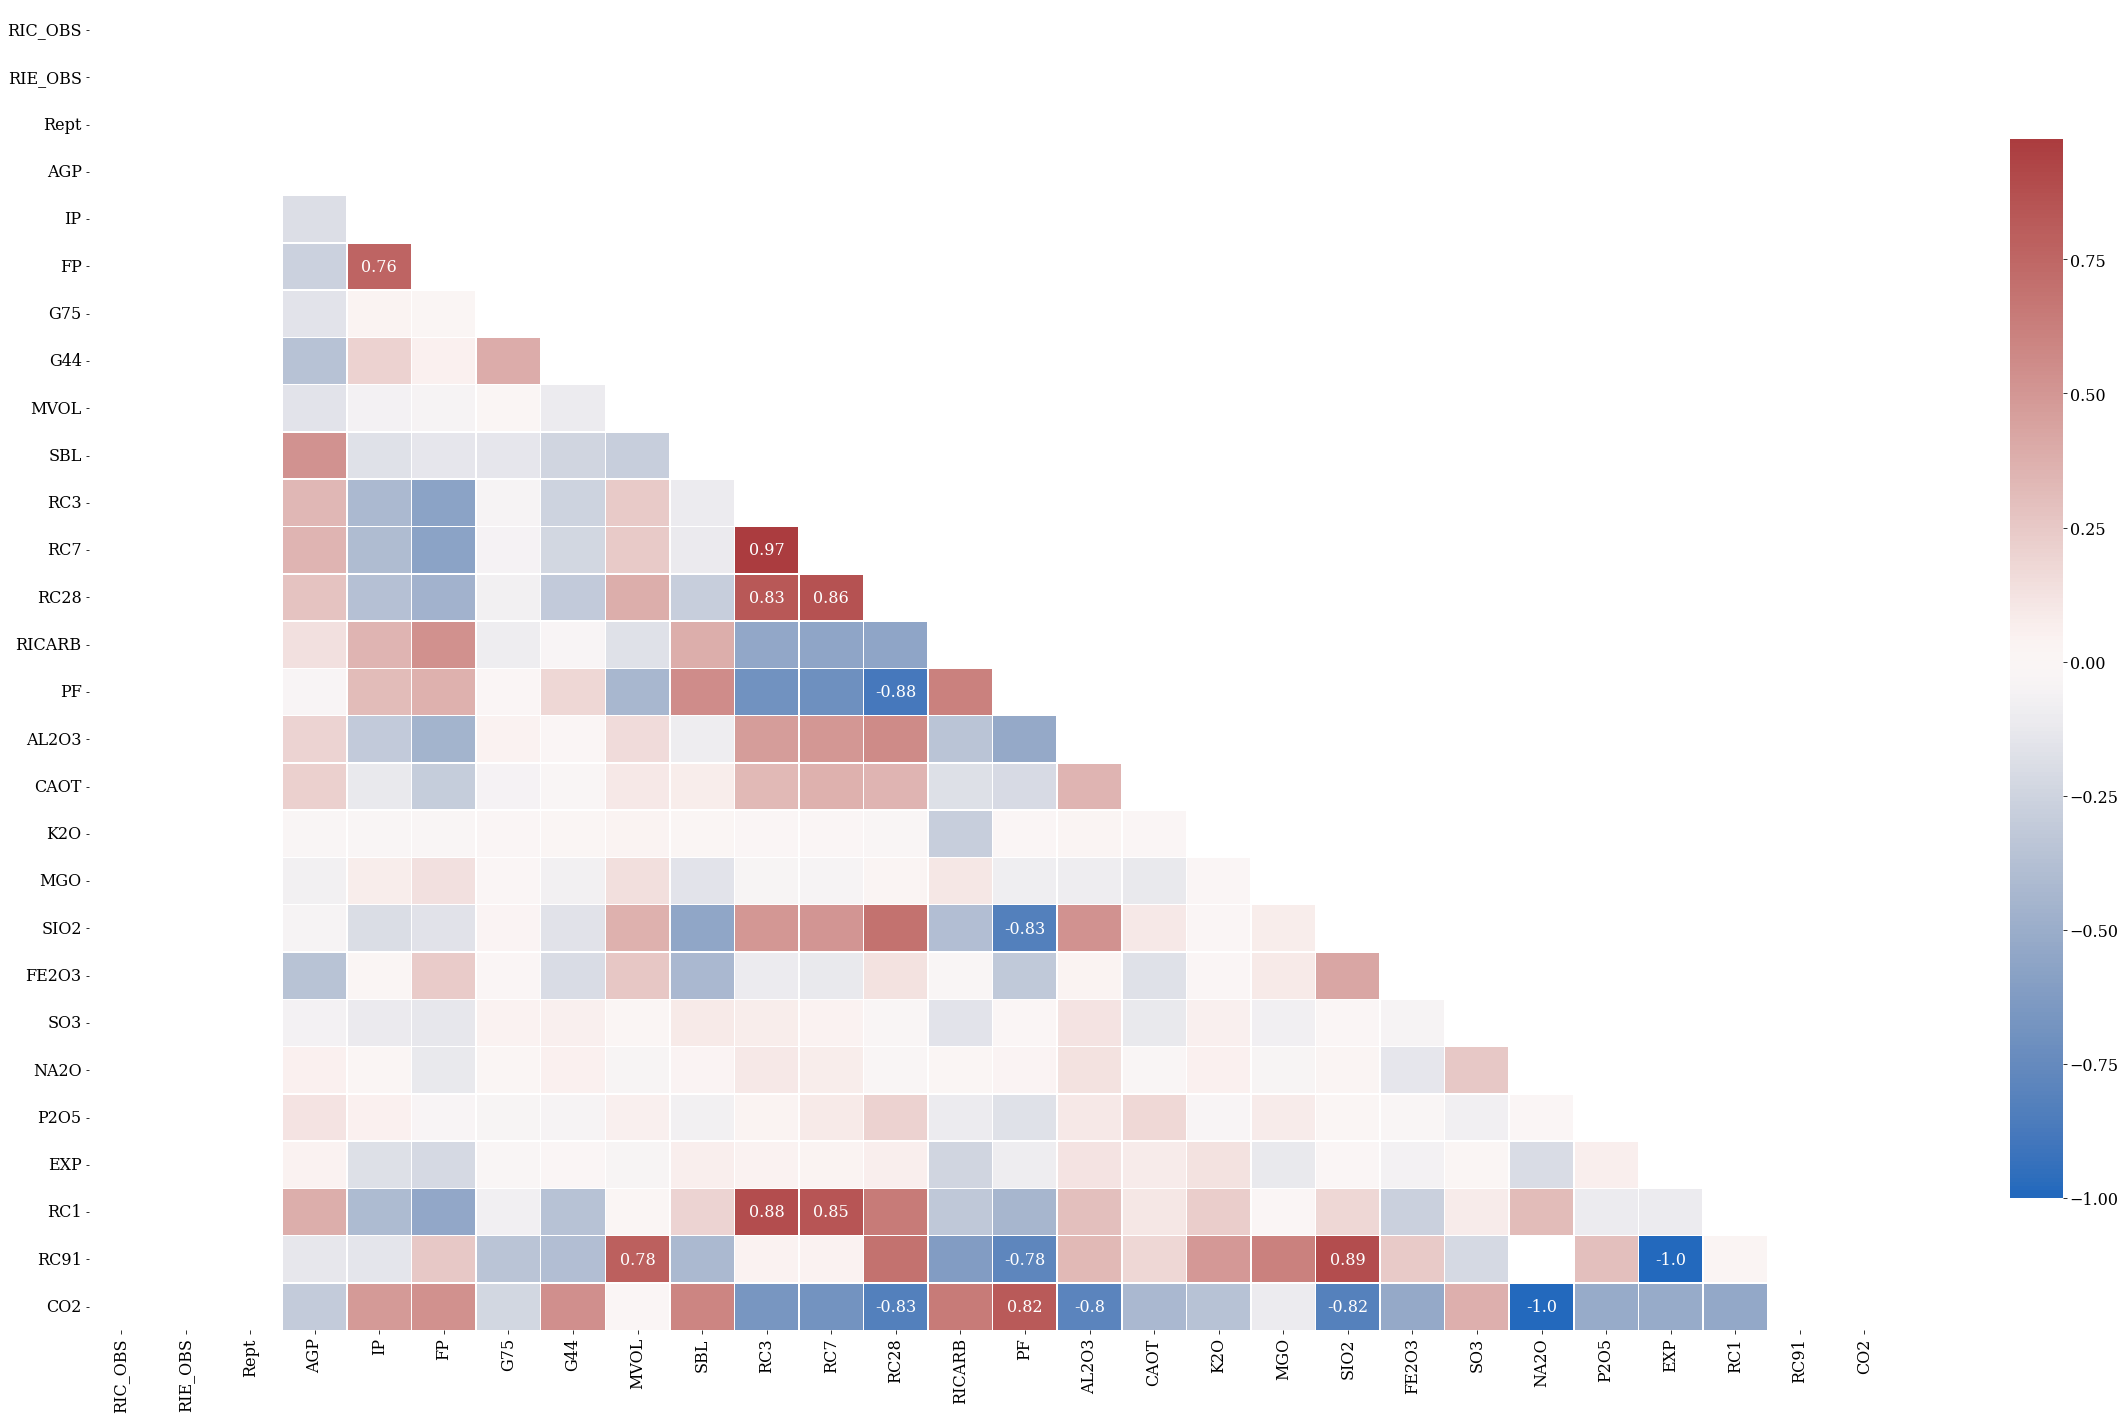

In [45]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) >= 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 2), ""
)

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 20))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [46]:
corr_matrix = df.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

NA2O   CO2     1.000000
EXP    RC91    1.000000
RC3    RC7     0.974969
SIO2   RC91    0.885251
RC3    RC1     0.883139
RC28   PF      0.881175
RC7    RC28    0.863971
       RC1     0.845444
RC3    RC28    0.830973
PF     SIO2    0.828552
RC28   CO2     0.825486
PF     CO2     0.822529
SIO2   CO2     0.822301
AL2O3  CO2     0.795314
MVOL   RC91    0.784773
PF     RC91    0.779864
IP     FP      0.763045
RC7    PF      0.714241
dtype: float64

In [47]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

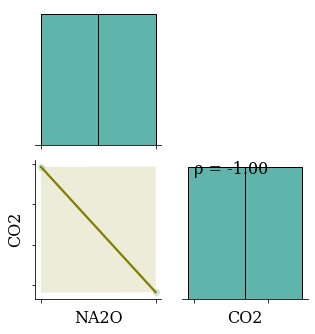

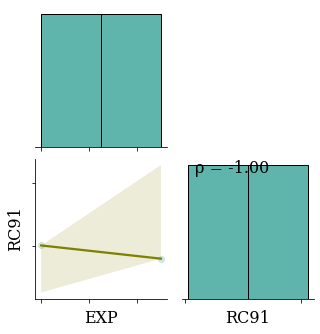

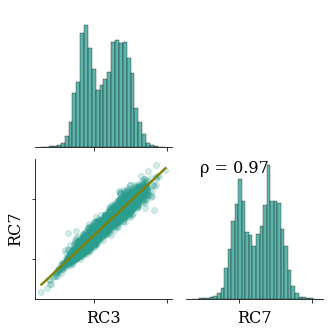

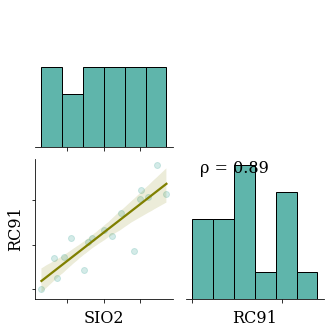

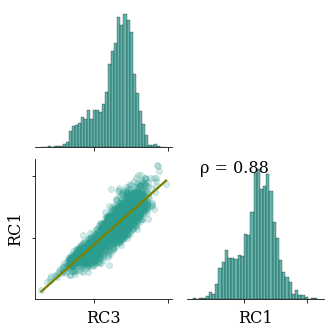

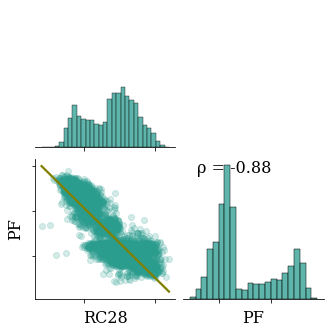

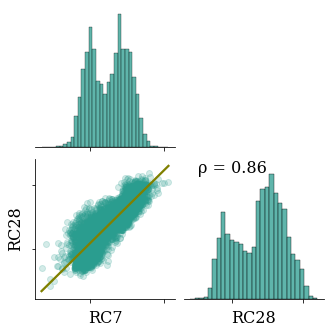

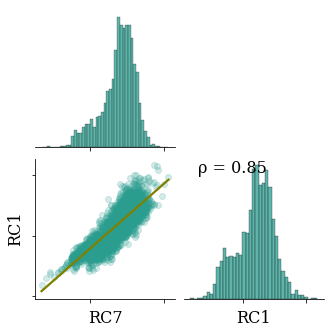

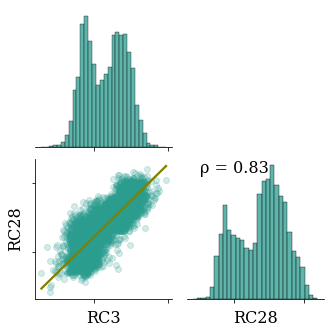

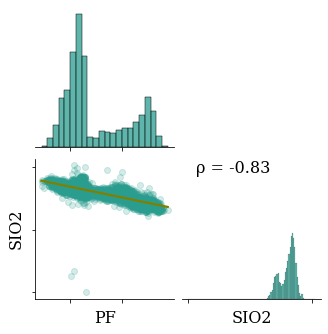

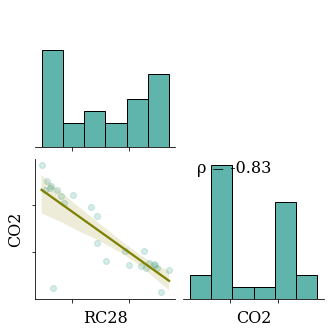

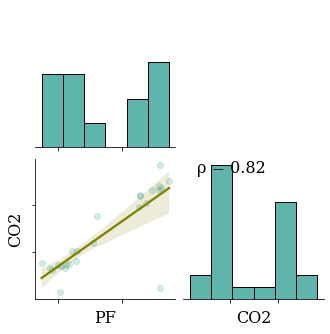

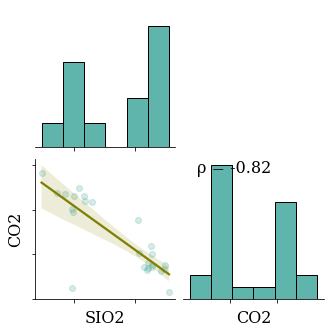

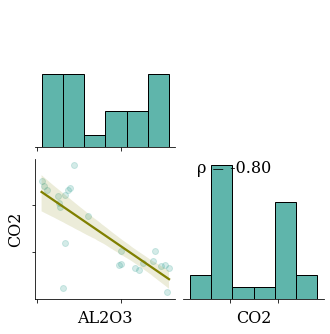

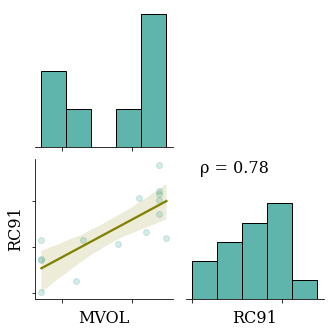

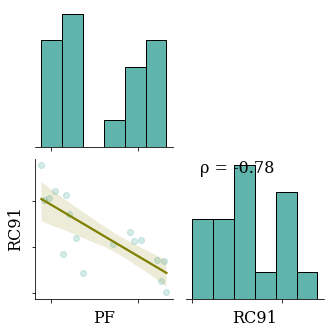

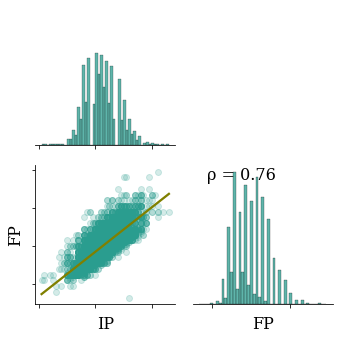

In [48]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Data/Hora Variable Analyses

In [49]:
dates

0      2008-01-02
1      2008-01-02
2      2008-01-03
3      2008-01-03
4      2008-01-04
          ...    
5569   2019-07-27
5570   2019-07-29
5571   2019-07-30
5572   2019-07-30
5573   2019-07-31
Name: Data, Length: 5574, dtype: datetime64[ns]

In [50]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

2856 valid days out of 2914


In [51]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2016, 2017, 2018, 2019, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}


In [52]:
months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2016: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2017: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2018: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2019: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2008: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2009: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2010: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2011: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2012: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2013: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2014: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2015: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}}

In [53]:
days_each_month_per_year = {}
for year in years:
    for month in months_each_year[year]:
        days_each_month_per_year[str(year) + "-" + str(month)] = [
            date.day for date in dates if date.year == year and date.month == month
        ]

print("Days of available data for each month each year:")
days_each_month_per_year

Days of available data for each month each year:


{'2016-1': [4,
  4,
  5,
  5,
  6,
  6,
  7,
  7,
  8,
  8,
  11,
  11,
  12,
  12,
  13,
  13,
  14,
  14,
  15,
  15,
  18,
  18,
  19,
  19,
  20,
  20,
  21,
  21,
  22,
  22,
  25,
  25,
  26,
  26,
  27,
  27,
  28,
  28,
  29,
  29],
 '2016-2': [1,
  1,
  2,
  2,
  3,
  3,
  4,
  4,
  5,
  5,
  8,
  10,
  10,
  11,
  11,
  12,
  12,
  15,
  15,
  16,
  16,
  17,
  17,
  18,
  18,
  19,
  19,
  22,
  22,
  23,
  23,
  24,
  24,
  25,
  25,
  26,
  26,
  29,
  29],
 '2016-3': [1,
  1,
  2,
  2,
  3,
  3,
  4,
  4,
  7,
  7,
  8,
  8,
  9,
  9,
  10,
  10,
  11,
  11,
  14,
  14,
  15,
  15,
  16,
  16,
  17,
  17,
  18,
  18,
  21,
  21,
  22,
  22,
  23,
  23,
  24,
  24,
  28,
  28,
  29,
  29,
  30,
  30,
  31,
  31],
 '2016-4': [1,
  1,
  4,
  4,
  5,
  5,
  6,
  6,
  7,
  7,
  8,
  8,
  11,
  11,
  12,
  12,
  13,
  13,
  14,
  14,
  15,
  15,
  18,
  18,
  19,
  19,
  20,
  20,
  25,
  25,
  26,
  26,
  27,
  27,
  28,
  28,
  29,
  29],
 '2016-5': [2,
  2,
  3,
  3,
  4,
  

In [54]:
# count of days each month per year
count_of_days_each_month_per_year = {}

for year_month, days in days_each_month_per_year.items():
    count_of_days_each_month_per_year[year_month] = len(days)

print("Count of days each month per year:")
count_of_days_each_month_per_year

Count of days each month per year:


{'2016-1': 40,
 '2016-2': 39,
 '2016-3': 44,
 '2016-4': 38,
 '2016-5': 42,
 '2016-6': 44,
 '2016-7': 42,
 '2016-8': 46,
 '2016-9': 43,
 '2016-10': 41,
 '2016-11': 45,
 '2016-12': 44,
 '2017-1': 45,
 '2017-2': 38,
 '2017-3': 43,
 '2017-4': 30,
 '2017-5': 35,
 '2017-6': 33,
 '2017-7': 32,
 '2017-8': 36,
 '2017-9': 30,
 '2017-10': 30,
 '2017-11': 32,
 '2017-12': 28,
 '2018-1': 30,
 '2018-2': 31,
 '2018-3': 34,
 '2018-4': 28,
 '2018-5': 27,
 '2018-6': 33,
 '2018-7': 32,
 '2018-8': 35,
 '2018-9': 29,
 '2018-10': 29,
 '2018-11': 35,
 '2018-12': 31,
 '2019-1': 26,
 '2019-2': 22,
 '2019-3': 28,
 '2019-4': 26,
 '2019-5': 28,
 '2019-6': 22,
 '2019-7': 25,
 '2019-8': 9,
 '2019-9': 6,
 '2019-10': 7,
 '2019-11': 8,
 '2019-12': 6,
 '2008-1': 45,
 '2008-2': 40,
 '2008-3': 40,
 '2008-4': 34,
 '2008-5': 46,
 '2008-6': 51,
 '2008-7': 43,
 '2008-8': 51,
 '2008-9': 44,
 '2008-10': 50,
 '2008-11': 41,
 '2008-12': 40,
 '2009-1': 43,
 '2009-2': 40,
 '2009-3': 44,
 '2009-4': 42,
 '2009-5': 43,
 '2009-6': 45,


In [55]:
max_obs_key = max(count_of_days_each_month_per_year, key=count_of_days_each_month_per_year.get)
max_obs_value = count_of_days_each_month_per_year[max_obs_key]
min_obs_key = min(count_of_days_each_month_per_year, key=count_of_days_each_month_per_year.get)
min_obs_value = count_of_days_each_month_per_year[min_obs_key]
print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2019-9 has the minimum number of days with samples - 6
2008-6 has the maximum number of days with samples - 51


In [56]:
mean_obs_per_year = {str(year) : 0 for year in years}

for year, value in count_of_days_each_month_per_year.items():
    mean_obs_per_year[year[:4]] += value

for year, value in months_each_year.items():
    mean_obs_per_year[str(year)] /= len(value)
    mean_obs_per_year[str(year)] = int(mean_obs_per_year[str(year)])
    
print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(np.mean(list(count_of_days_each_month_per_year.values()))))

Mean Number of observations - per year
{'2016': 42, '2017': 34, '2018': 31, '2019': 17, '2008': 43, '2009': 42, '2010': 43, '2011': 40, '2012': 42, '2013': 42, '2014': 42, '2015': 41}

Mean number of observations - all years
38


In [57]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i-1])
diffs

[Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedel

In [58]:
# Average Frequency
np.mean(diffs)

Timedelta('0 days 18:12:28.035169567')

In [59]:
Counter(diffs)

Counter({Timedelta('0 days 00:00:00'): 2651,
         Timedelta('1 days 00:00:00'): 2112,
         Timedelta('3 days 00:00:00'): 509,
         Timedelta('2 days 00:00:00'): 69,
         Timedelta('4 days 00:00:00'): 33,
         Timedelta('337 days 00:00:00'): 1,
         Timedelta('-334 days +00:00:00'): 1,
         Timedelta('5 days 00:00:00'): 10,
         Timedelta('7 days 00:00:00'): 1,
         Timedelta('-1 days +00:00:00'): 5,
         Timedelta('-3 days +00:00:00'): 2,
         Timedelta('-2 days +00:00:00'): 1,
         Timedelta('6 days 00:00:00'): 1,
         Timedelta('-5 days +00:00:00'): 1,
         Timedelta('-4 days +00:00:00'): 1,
         Timedelta('34 days 00:00:00'): 1,
         Timedelta('28 days 00:00:00'): 10,
         Timedelta('31 days 00:00:00'): 59,
         Timedelta('30 days 00:00:00'): 40,
         Timedelta('92 days 00:00:00'): 13,
         Timedelta('-320 days +00:00:00'): 1,
         Timedelta('-29 days +00:00:00'): 2,
         Timedelta('89 days 00:00

<AxesSubplot:xlabel='count'>

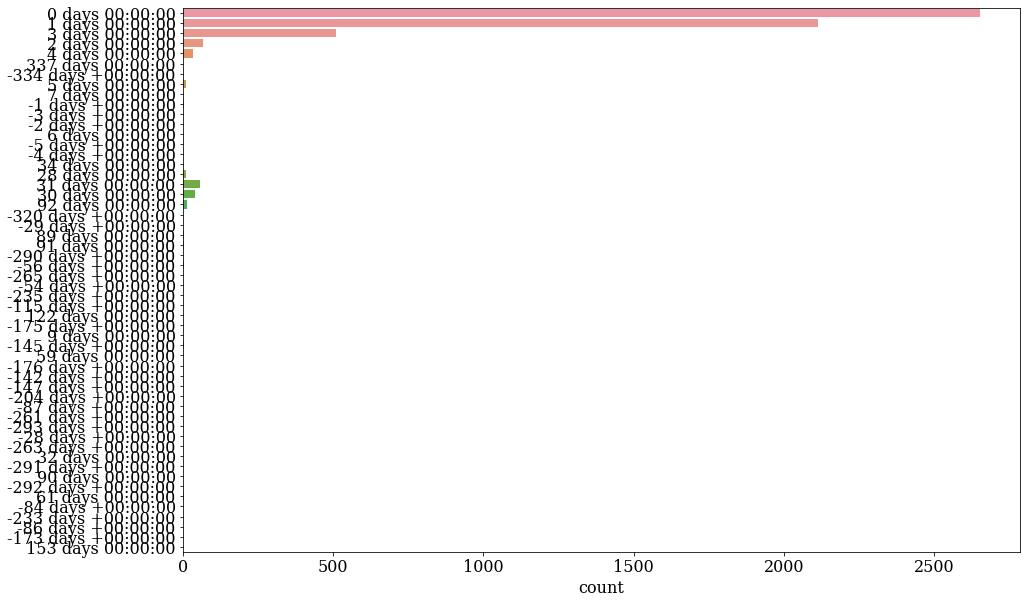

In [60]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [61]:
# Same thing but only with the dates

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i].date() - dates[i-1].date())

In [62]:
# Average Frequency
np.mean(diffs)

datetime.timedelta(0, 65548, 35170)

In [63]:
Counter(diffs)

Counter({datetime.timedelta(0): 2651,
         datetime.timedelta(1): 2112,
         datetime.timedelta(3): 509,
         datetime.timedelta(2): 69,
         datetime.timedelta(4): 33,
         datetime.timedelta(337): 1,
         datetime.timedelta(-334): 1,
         datetime.timedelta(5): 10,
         datetime.timedelta(7): 1,
         datetime.timedelta(-1): 5,
         datetime.timedelta(-3): 2,
         datetime.timedelta(-2): 1,
         datetime.timedelta(6): 1,
         datetime.timedelta(-5): 1,
         datetime.timedelta(-4): 1,
         datetime.timedelta(34): 1,
         datetime.timedelta(28): 10,
         datetime.timedelta(31): 59,
         datetime.timedelta(30): 40,
         datetime.timedelta(92): 13,
         datetime.timedelta(-320): 1,
         datetime.timedelta(-29): 2,
         datetime.timedelta(89): 3,
         datetime.timedelta(91): 4,
         datetime.timedelta(-290): 1,
         datetime.timedelta(-56): 4,
         datetime.timedelta(-265): 2,
         d

In [64]:
# percent of diffs
[round(val/df.shape[0] *100, 2) for val in list(Counter(diffs).values())]

[47.56,
 37.89,
 9.13,
 1.24,
 0.59,
 0.02,
 0.02,
 0.18,
 0.02,
 0.09,
 0.04,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.18,
 1.06,
 0.72,
 0.23,
 0.02,
 0.04,
 0.05,
 0.07,
 0.02,
 0.07,
 0.04,
 0.02,
 0.02,
 0.04,
 0.02,
 0.04,
 0.02,
 0.05,
 0.02,
 0.02,
 0.02,
 0.04,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.04,
 0.02,
 0.05,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02]

<AxesSubplot:xlabel='count'>

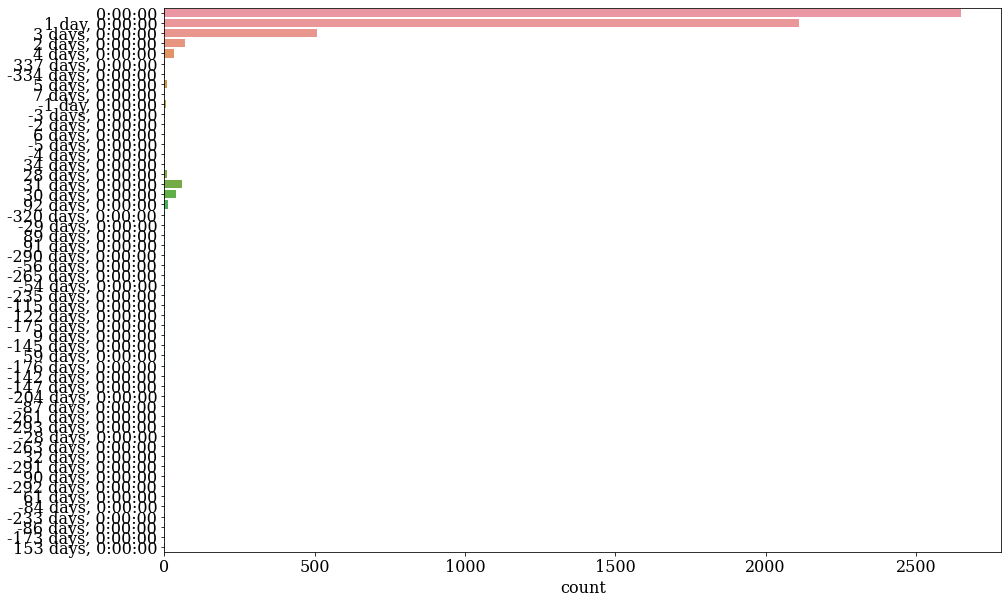

In [65]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y= diffs)

### Compressive Strength Distribution

#### 1 Days

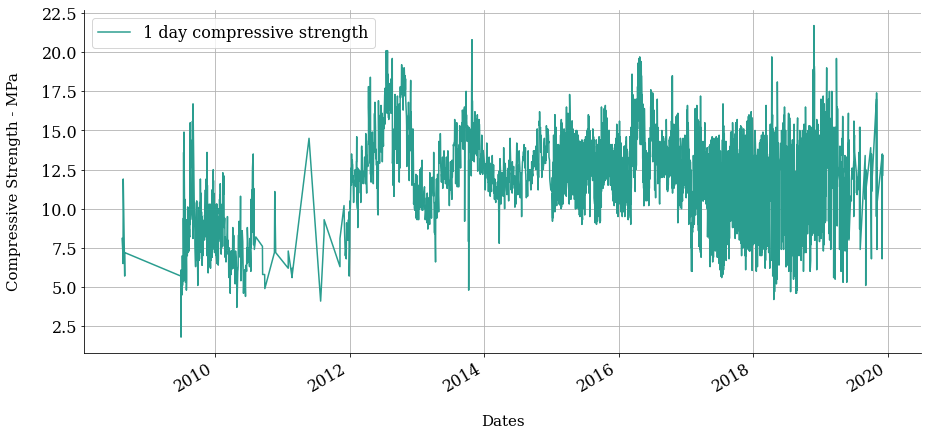

In [66]:
tmp = df[["Data", "RC1"]].dropna().copy()
tmp = tmp.set_index("Data")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### 3 Days

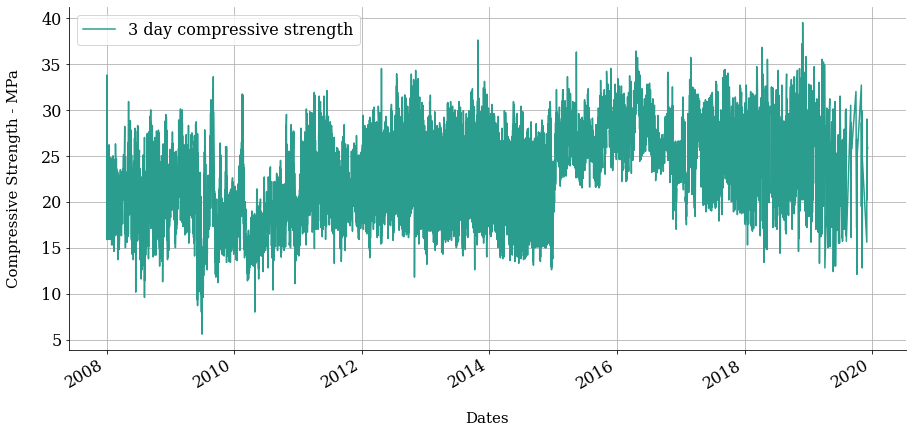

In [67]:
tmp = df[["Data", "RC3"]].dropna().copy()
tmp = tmp.set_index("Data")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### 7 Days

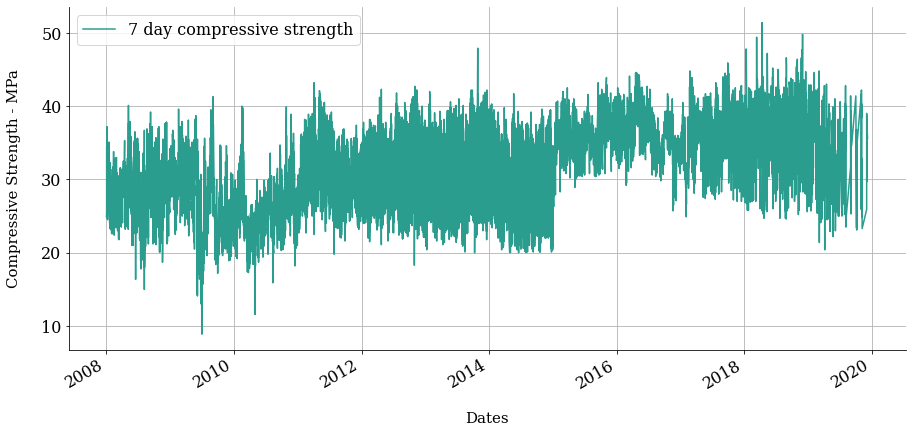

In [68]:
tmp = df[["Data", "RC7"]].dropna().copy()
tmp = tmp.set_index("Data")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### 28 Days

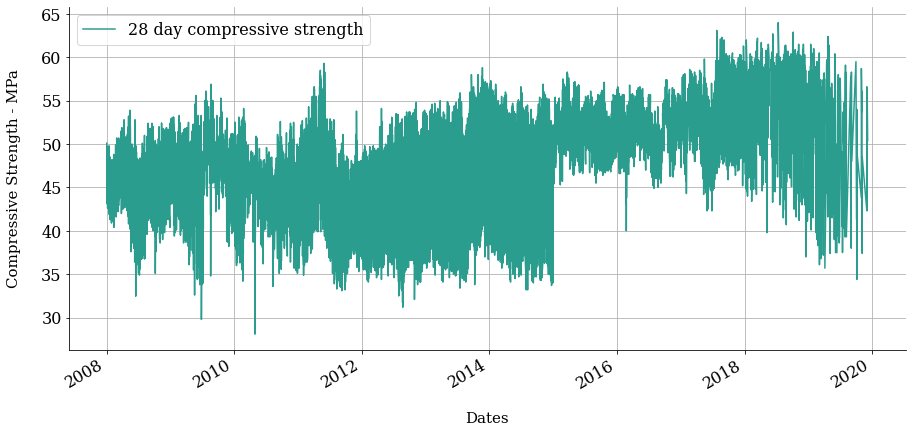

In [69]:
tmp = df[["Data", "RC28"]].dropna().copy()
tmp = tmp.set_index("Data")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()